Ceren Yılmaz Gülten 
11 Exercise MonteCarlo

In [2]:
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt

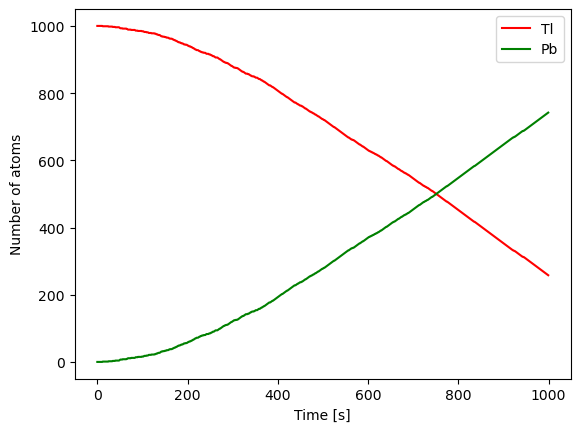

Text(0.5, 0, 'Times [s]')

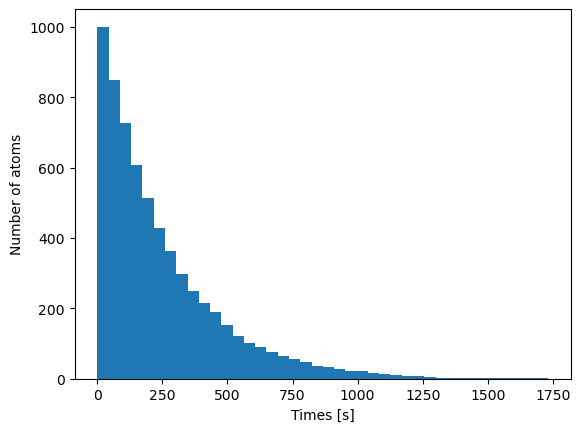

In [13]:
# 1. Radioctive Decay Chain

tau = 3.052*60 
# in the question half-lieve is given as 3.052 minutes, 
# since the time in the question is second
# Part 1.
def first_prob(t):
    return 1-2**(-(t)/(tau)) # the probability function in the question 

thallium = []
lead = []
thalliumatom = 1000
leadatom = 0

for i in range(1,1001): # steps in time of 1 second 
    if (np.random.uniform(0,1) < first_prob(i)):
        # if probabilty is higher than the uniform distribution thallium atom will be increased 
        # and lead atom(Pb) will be increased 
        # # to plot this we need to saved every step so added to list   
        thalliumatom -= 1
        leadatom += 1
    thallium.append(thalliumatom)
    lead.append(leadatom)
    
plt.plot(thallium,c="r",label="Tl")
plt.plot(lead,c="g",label="Pb")
plt.xlabel("Time [s]")
plt.ylabel("Number of atoms")
plt.legend()
plt.show() 

# Part 2 
def second_decay(p):

    return -np.log(1-p)/(np.log(2)/(tau))
    # from inverse tranform method 

atoms = second_decay(np.random.uniform(0,1,1000)) # the probability is calculated based on uniform distiribution 

plt.hist(atoms,bins=40,cumulative=-1) # cumulative gives the direction of accumulation is reversed
# since in the question, it asked to not decayed, change to cumulative to -1. 
plt.ylabel("Number of atoms")
plt.xlabel("Times [s]")

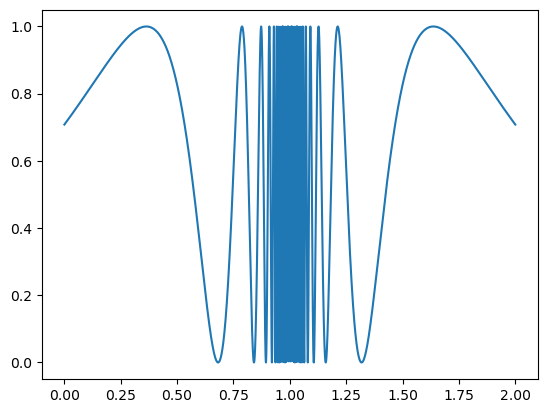

Integral:  1.345
Error:  0.006326182095861611
Integral for mean value method part:  1.3414527366658562
Error for mean value method part:  0.006566807316545985


In [21]:
# 2. Monte Carlo integration: hit/miss vs mean value method

def f(x):
    return (np.sin(1/((1-x))))**2

count = 0
iteration = 10000

x = np.linspace(0, 2, iteration)
plt.plot(x, f(x))
plt.show()

for i in range(iteration):
    x = 2 * np.random.random() # x is random uniform between 0 and 2 in the question 
    y = np.random.uniform(0,1) # y is random uniform between 0 and 1 
    if y < f(x):
        count += 1 
        
I = 2 * count / iteration # from monta carlo integration formula and 2 is the (2-0) since x between 2 and 0
error = 0.674*math.sqrt((I*(2*1-I))/iteration) # from variance and standart derivation and multiply with appropraite factor for hit/miss method

print("Integral: ", I)
print("Error: ", error)

# Part 2
sum_f = []
for i in range(iteration):
    x = 2*np.random.random() # x is random uniform between 0 and 2 in the question 
    sum_f.append(f(x)) # add the all values to sum the all f(x) values
# formulas are same as the monta carlo integration mean value method
# 2 is come from x between 0 and 2 and in the formulation it say b-a
# in this situation b = 2 and a = 0 from the integral 
I_meanpart = 2*np.sum(sum_f)/iteration 
error_meanpart = 2*np.std(sum_f)/math.sqrt(iteration)

print("Integral for mean value method part: ", I_meanpart)
print("Error for mean value method part: ", error_meanpart)

In [26]:
# 3. Monte Carlo integration in high dimension

def f(x,y):
    return x**2 + y**2

iteration = 100000
points = 0
inside_point = 0
for i in range(iteration):
    x = np.random.uniform(-1, 1) # random number for unit circle from -1 to 1,
    y = np.random.uniform(-1, 1)
    point = np.random.uniform(-1,1,10) # since the 10D the random unşfıorm size needs to be 10
    if f(x,y) <= 1: # unit circle function 
        points += 1 # adding each result with that we will have number of all points 
    if np.linalg.norm(point) <= 1:  # get the all points distance from the center 
        inside_point += 1 

I = 4* (points / iteration) # since in the formula V is actually multiplication for this reason 
# it is side length ** 2 so it is 4. 
ten_sphere = (inside_point / iteration) * (2**10) # multiple radius with 2 for side length and since it is 10D it needs to be 2**10
print("Area of circle: ", I)
print("10-D Sphere:", ten_sphere )


Area of circle:  3.14868
10-D Sphere: 2.74432


In [31]:
# 4. Monte Carlo integration with importance sampling

def f(x):
    return x**(-1/2) / (np.exp(x) + 1)

def w(x):
    return 1 / np.sqrt(x)

iteration = 1000000 
points = np.random.uniform(0, 1, iteration) # uniform random points for function

weight = f(points) / w(points) # calculation weight for each sample 
I_new = np.mean(weight)*2 # for normalize mean value multiple with 2
print(I_new)

0.7599442963959011
